In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max") #getting all the history of SNP500 from as far back as possible

In [4]:
sp500 #just prints out our current table

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-02 00:00:00-04:00,5580.759766,5695.310059,5571.479980,5670.970215,4243830000,0.0,0.0
2025-04-03 00:00:00-04:00,5492.740234,5499.529785,5390.830078,5396.520020,7210470000,0.0,0.0
2025-04-04 00:00:00-04:00,5292.140137,5292.140137,5069.899902,5074.080078,8853500000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-03-26 00:00:00-04:00', '2025-03-27 00:00:00-04:00',
               '2025-03-28 00:00:00-04:00', '2025-03-31 00:00:00-04:00',
               '2025-04-01 00:00:00-04:00', '2025-04-02 00:00:00-04:00',
               '2025-04-03 00:00:00-04:00', '2025-04-04 00:00:00-04:00',
               '2025-04-07 00:00:00-04:00', '2025-04-08 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24433, freq=None)

<Axes: xlabel='Date'>

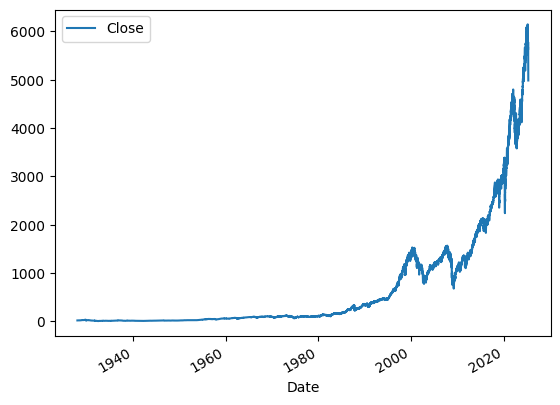

In [6]:
sp500.plot.line(y="Close", use_index = True) #shows the closing price of sp500 from the start

In [7]:
#Deleteing these two columns from our sp500 dataset since theyre arent relevant for this project. 
del sp500["Dividends"] 
del sp500["Stock Splits"] #stock splits are more relevant for individual stocks not an index fund so dont need that

In [8]:
# purpose of this cell is to create a new column called Tomorrow and basically the data in this columns will be the closing price of the next day. 
# hence the shift -1
sp500["Tomorrow"] = sp500["Close"].shift(-1) 

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-04-02 00:00:00-04:00,5580.759766,5695.310059,5571.479980,5670.970215,4243830000,5396.520020
2025-04-03 00:00:00-04:00,5492.740234,5499.529785,5390.830078,5396.520020,7210470000,5074.080078
2025-04-04 00:00:00-04:00,5292.140137,5292.140137,5069.899902,5074.080078,8853500000,5062.250000


In [10]:
# Now we are creating another column in our sp500 dataset. this one will return a boolean telling us whether the price of tomorrow is greater then the close of that day.
# Since we cant really use boolean to help us with training a model and machine learning, we will convert the boolean to an int where 1=True and 0=False
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-04-02 00:00:00-04:00,5580.759766,5695.310059,5571.479980,5670.970215,4243830000,5396.520020,0
2025-04-03 00:00:00-04:00,5492.740234,5499.529785,5390.830078,5396.520020,7210470000,5074.080078,0
2025-04-04 00:00:00-04:00,5292.140137,5292.140137,5069.899902,5074.080078,8853500000,5062.250000,0


In [12]:
# Having a lot of data is a good thing but in our case, having older stock market data dating back to the 1930s we don't want. 
# As times go on the market shifts and changes so a better timeframe to look at is starting from 1990.
# uses the pandas lib method "loc"| .copy is needed because pandas might give warning sometimes with a dataset
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-04-02 00:00:00-04:00,5580.759766,5695.310059,5571.479980,5670.970215,4243830000,5396.520020,0
2025-04-03 00:00:00-04:00,5492.740234,5499.529785,5390.830078,5396.520020,7210470000,5074.080078,0
2025-04-04 00:00:00-04:00,5292.140137,5292.140137,5069.899902,5074.080078,8853500000,5062.250000,0


In [14]:
from sklearn.ensemble import RandomForestClassifier #importing RandomForestCalssifier from scikit-learn’s ensemble module.
# This model is an ensemble learning method that builds multiple decision trees and combines their results for better accuracy.

# n_estimators=100 → Creates 100 decision trees in the forest.
# min_samples_split=100 → A node must have at least 100 samples before it splits into branches.
# random_state=1 → Ensures consistent results every time you run the code by fixing randomness.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# train = sp500.iloc[:-100] → Uses all rows except the last 100 for training.
# test = sp500.iloc[-100:] → Uses only the last 100 rows for testing.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

# train[predictors] → Extracts the selected feature columns from the training data.
# train["Target"] → Uses the "Target" column as the output label (the value the model tries to predict).
# .fit() → Trains the Random Forest model using the selected features.

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score #all this is saying is basically when we said that the market would go up (when target went up) did the market actually go up??

preds = model.predict(test[predictors]) # passing in test set with the predictors

In [16]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [17]:
precision_score(test["Target"], preds)

0.4864864864864865

In [18]:
combined = pd.concat([test["Target"], preds], axis = 1) # axis = 1 teaches each input as a column 

<Axes: xlabel='Date'>

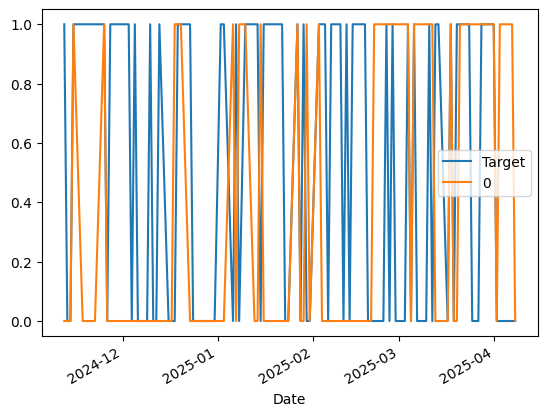

In [19]:
combined.plot() # this draws out a graph for us that shows our prediction (orange) and what actually happened (blue)

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [29]:
def backtest(data, model, predictors, start =2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [30]:
predictions = backtest(sp500, model, predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0    3737
1    2646
Name: count, dtype: int64